In [ ]:
%matplotlib inline
import intake
import xarray as xr
import matplotlib
import pandas as pd
import cartopy.crs as ccrs
import seaborn as sns
from esio import ice_plot
import dask

In [ ]:
# from dask.distributed import Client
# client = Client(n_workers=8)

In [2]:
dask.config.set(scheduler='threads')

In [ ]:
# from dask.distributed import Client, progress
# from dask_kubernetes import KubeCluster
# cluster = KubeCluster(n_workers=20)
# cluster

In [ ]:
# client = Client(cluster)
# client

### Load in SIPN2 SIC and SIT and make spatial plots

In [ ]:
### Connect to the Google cloud bucket and open the dataest
#
# Access to the sipn-data set is not yet public. Access to SIPN participants will be provide by end of 2018.
# Questions can be addressed to nicway@uw.edu.

In [ ]:
ds_gcs = intake.Catalog('./catalog.yaml').SIPN2_SIC.to_dask()
ds_gcs

In [ ]:
da = ds_gcs.SIP.sel(model='MME').isel(init_end=30, fore_time=4)
da

### Plot the Multi-model mean Sea Ice Concentration (SIC) forecast Initialized on 2018-08-05 with a lead time of 28 days

In [ ]:
cmap_sic = matplotlib.colors.ListedColormap(sns.color_palette("Blues_r", 10))
cmap_sic.set_bad(color = 'lightgrey')

(f, ax1) = ice_plot.polar_axis()
f.set_size_inches(10, 5)


da.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmap_sic,
                      vmin=0, vmax=1, cbar_kwargs={'label':'Sea Ice Concentration (-)'})
ax1.set_title('Valid time\n'+pd.to_datetime((da.init_end+da.fore_time).values).strftime('%Y-%m-%d'))

In [3]:
ds_SIT = intake.Catalog('./catalog.yaml').SIPN2_SIT.to_dask()
ds_SIT

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=586241054156-ls4nduknhnelm2u6jtdgii15gsa3iv4v.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.read_only&state=bEDAWopHiGeEwo5MJXv5pjCFOGqdL8&access_type=offline&prompt=consent


Enter the authorization code:  4/ewCrLgXu6191_soFffwJo2P8QLl1Ot1ero9wfN1hNzPvRKvX3D8GNBg


<xarray.Dataset>
Dimensions:        (fore_time: 72, init_end: 56, model: 6, x: 304, y: 448)
Coordinates:
  * fore_time      (fore_time) timedelta64[ns] 0 days 1 days 2 days 3 days ...
  * init_end       (init_end) datetime64[ns] 2018-02-01 2018-02-06 ...
    lat            (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
    lon            (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
  * model          (model) object 'Observed' 'gfdlsipn' 'rasmesrl' ...
Dimensions without coordinates: x, y
Data variables:
    mean_25km_1km  (init_end, model, fore_time, x, y) float64 dask.array<shape=(56, 6, 72, 304, 448), chunksize=(1, 1, 1, 304, 448)>

/srv/conda/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


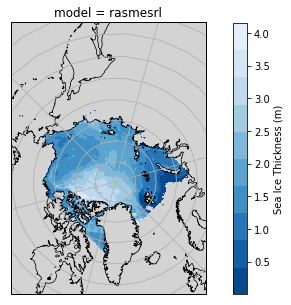

In [8]:
cmap_sic = matplotlib.colors.ListedColormap(sns.color_palette("Blues_r", 10))
cmap_sic.set_bad(color = 'lightgrey')

(f, ax1) = ice_plot.polar_axis()
f.set_size_inches(10, 5)

da = ds_SIT.sel(model='rasmesrl').mean(dim=['init_end','fore_time']).mean_25km_1km  
da.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmap_sic,
                             cbar_kwargs={'label':'Sea Ice Thickness (m)'})